### Notebook goals:
Simulate the motion of N test masses on a ring by solving 
$$ \delta x^{i} = \delta x_0^{i} + \frac{1}{2}\eta^{ik}h_{kj}\delta x^{j}$$
with
$$ h_{22} = -h_{33} = A_{+}cos(\omega(t-\frac{x}{c}))$$
$$ h_{23} =  h_{32} = A_{\times}cos(\omega(t-\frac{x}{c}))$$
1.  **Sinusoidal wave**\
    1.1  **Plus polarization,  x direction**  : strain as a function of the wave phase\
    1.2  **Cross polarization, x direction** : strain as a function of the wave phase\
2.  **Chirp wave** : strain as a function of the wave phase


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from scipy import constants as cnst
from scipy.signal import welch

In [2]:
def wave(A, phase):
    return A * np.sin(phase)

In [3]:
def angle(x,y):
    return np.arctan2(x,y)

In [4]:
P       = 4 # Number of phase evolution plots
phases  = np.arange(0,2*np.pi+2*np.pi/P,2*np.pi/P)
d0      = np.array([0,0,0,1])

Initial positions of N test masses on a unit circle

In [5]:
N = 10 # Number of masses
theta = np.arange(0,2*np.pi, 2*np.pi/N)  # Angles for 4 masses
x0 = np.cos(theta)  # X-coordinates
y0 = np.sin(theta)  # Y-coordinates
positions0 = np.vstack((x0, y0))  # Shape (2,4)

Compute new positions and plot

In [6]:
# Function to calculate strain tensor and new positions
def get_positions(h, positions0):
    return positions0 + 0.5 * h @ positions0

In [7]:
# Function to plot each phase
def plot_phase(ax, positions0, positions_new, phi, phase_label):
    ax.scatter(positions0[0], positions0[1], color='blue', label='Initial', zorder=5, alpha=0.6)
    ax.scatter(positions_new[0], positions_new[1], color='orange', label='After GW', zorder=5, alpha=0.6)

    # Plot displacement vectors
    for i in range(len(positions0)):
        ax.plot([positions0[0, i], positions_new[0, i]], 
                [positions0[1, i], positions_new[1, i]], 'k--', lw=0.5)

    # Fit an ellipse to the new red points
    cov = np.cov(positions_new)
    v, w = np.linalg.eigh(cov)  # Eigenvalues and eigenvectors
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)  # Scale the axes
    angle = np.arctan2(*w[:, 0][::-1])  # Compute angle of rotation

    # Ellipse parameters
    ellipse = Ellipse(xy=np.mean(positions_new, axis=1), width=v[0], height=v[1],
                      angle=np.degrees(angle), color='orange', fill=False, linestyle='-', linewidth=2)
    ax.add_patch(ellipse)
    
    # Plot the reference circle
    circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='dotted', linewidth=1.2)
    ax.add_patch(circle)
    
    # Formatting
    ax.set_xlabel("$x$", fontsize=12)
    ax.set_ylabel("$y$", fontsize=12)
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.legend(loc='upper left', fontsize=10)
    ax.set_title(f"$T = {phi/(2*np.pi):.2f} \pi$", fontsize=14)
    ax.set_aspect('equal')

<>:32: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\p'
C:\Users\ricca\AppData\Local\Temp\ipykernel_11696\1348923542.py:32: SyntaxWarning: invalid escape sequence '\p'
  ax.set_title(f"$T = {phi/(2*np.pi):.2f} \pi$", fontsize=14)


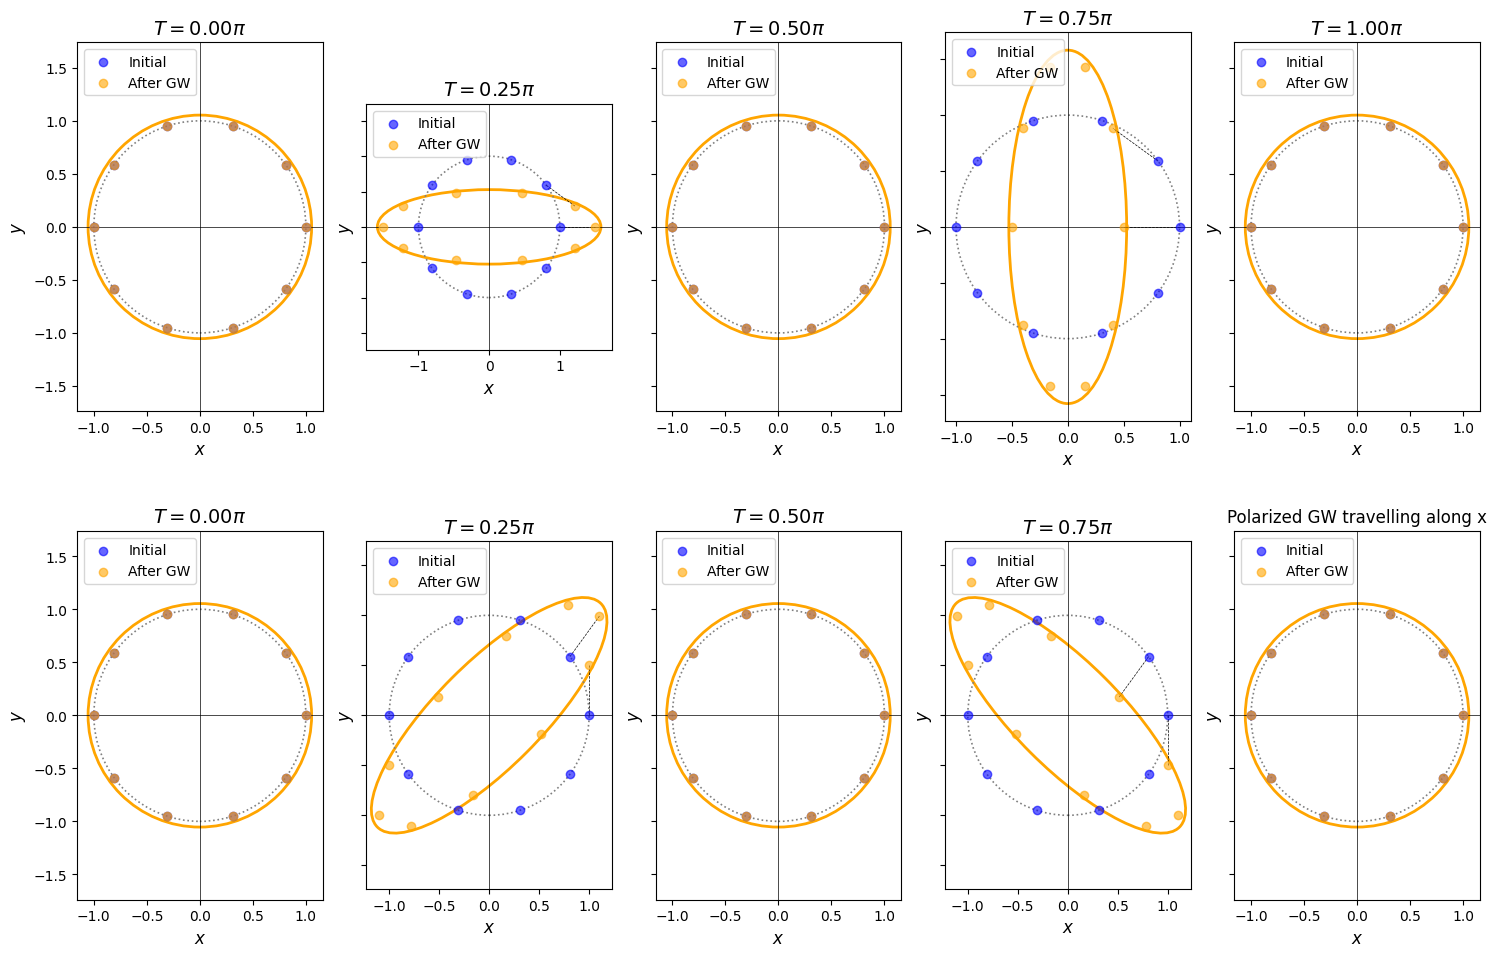

In [8]:
# Create the subplots
fig, axs = plt.subplots(2, P+1, figsize=(15, 10), sharex=False, sharey=True)

# Loop over each polarization (A_plus and A_cross)
for k in range(2):
    if k == 0:
        A_plus, A_cross = 1, 0  # "+" polarization
    else:
        A_plus, A_cross = 0, 1  # "×" polarization
    
    # Loop over each phase value
    for i, phi in enumerate(phases):
        ax = axs[k][i]
        
        # Calculate strain tensor h_ij
        h_22 = wave(A_plus, phi)
        h_33 = -h_22
        h_23 = h_32 = wave(A_cross, phi)

        h = np.array([[h_22, h_23],
                      [h_32, h_33]])

        # Get new positions after applying strain
        positions_new = get_positions(h, positions0)

        # Plot the phase results
        plot_phase(ax, positions0, positions_new, phi, f"Phase {i+1}")

# Adjust layout for better spacing
plt.title("Polarized GW travelling along x")
plt.tight_layout()

Now we should use the link between position, time and phase of the wave
$$ \phi = \omega \left( t - \frac{x}{c} \right) \implies x = c\left(t - \frac{\phi}{\omega}\right)$$ 
Nothing should change...

In [9]:
omega = 1
c = cnst.c*10**2

In [10]:
N = 10 # Number of masses
theta = np.arange(0,2*np.pi+2*np.pi/N, 2*np.pi/N)  # Angles for N masses
t = np.arange(0,100+100/N, 100/N)  #
x = c * (t - theta/omega)
x0 = np.cos(omega * (t - x/c))  # X-coordinates
y0 = np.sin(omega * (t - x/c))  # Y-coordinates
positions0 = np.vstack((x0, y0))  # Shape (2,4)

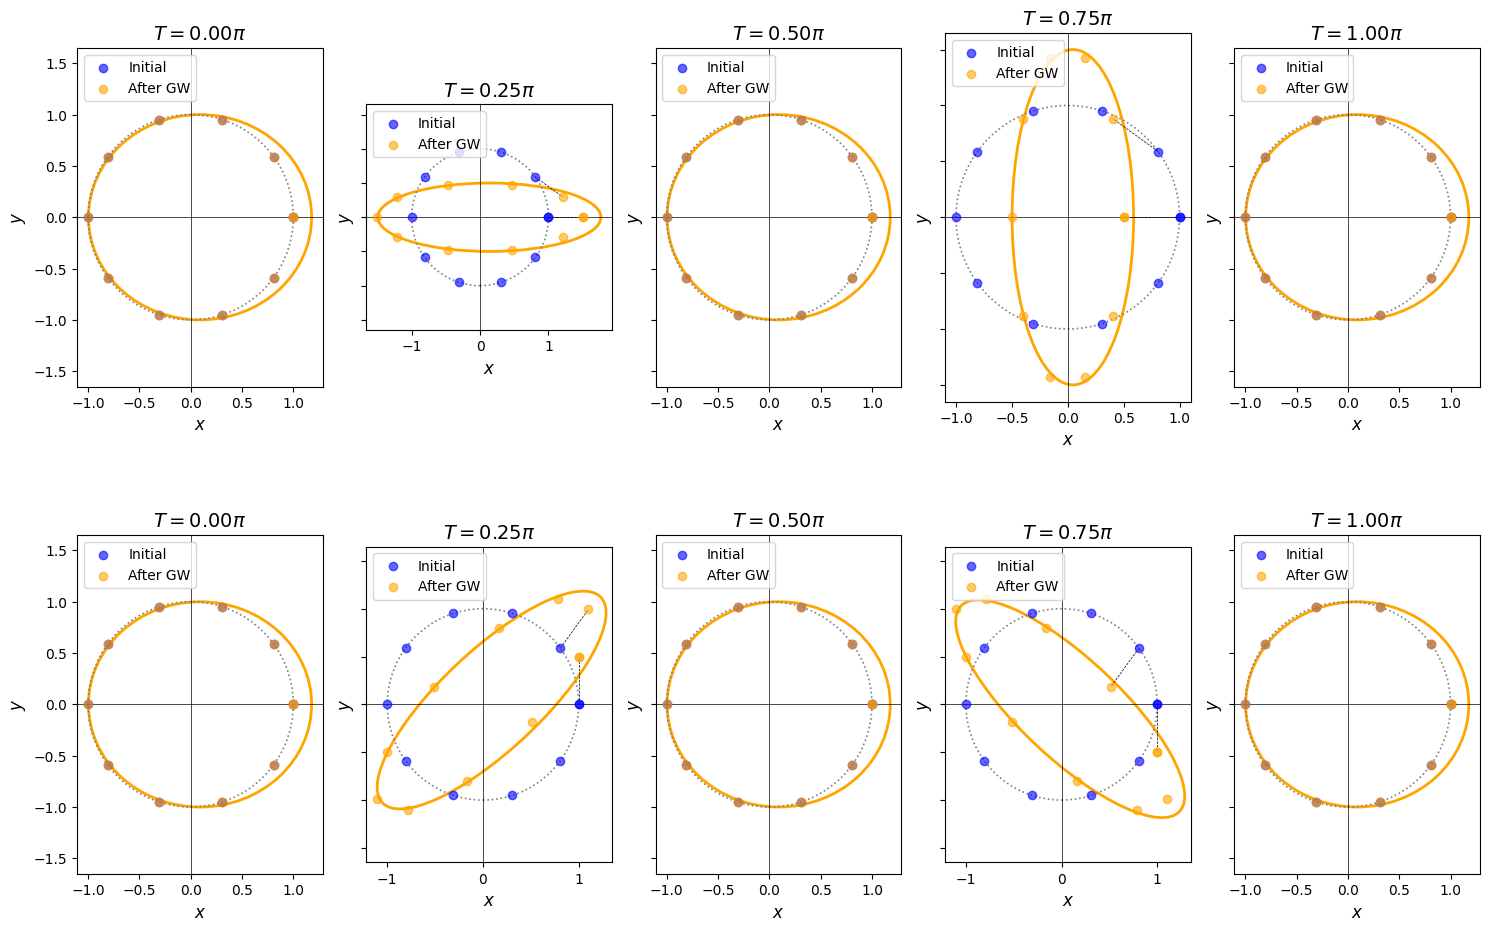

In [11]:
# Create the subplots
fig, axs = plt.subplots(2, P+1, figsize=(15, 10), sharex=False, sharey=True)

# Loop over each polarization (A_plus and A_cross)
for k in range(2):
    if k == 0:
        A_plus, A_cross = 1, 0  # "+" polarization
    else:
        A_plus, A_cross = 0, 1  # "×" polarization
    
    # Loop over each phase value
    for i, phi in enumerate(phases):
        ax = axs[k][i]
        
        # Calculate strain tensor h_ij
        h_22 = wave(A_plus, phi)
        h_33 = -h_22
        h_23 = h_32 = wave(A_cross, phi)

        h = np.array([[h_22, h_23],
                      [h_32, h_33]])

        # Get new positions after applying strain
        positions_new = get_positions(h, positions0)

        # Plot the phase results
        plot_phase(ax, positions0, positions_new, phi, f"Phase {i+1}")

# Adjust layout for better spacing
plt.tight_layout()

Now with a chirp!

In [13]:
import pandas as pd

In [46]:
# Use a raw string or double backslashes for the path
file_path = r"C:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Notebooks\Others\GW-signals\simulated.txt"  # Use the correct path to your file

# Read the file
data = pd.read_csv(file_path, sep="\t", header=0, names=["time", "h_+", "h_x"])

In [47]:
data['phase'] = np.atan2(data['h_+'], data['h_x'])

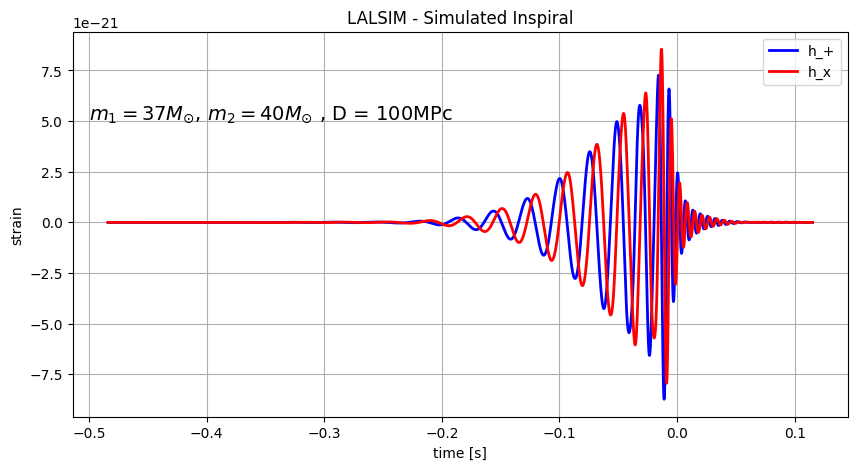

In [48]:
fig, _ = plt.subplots(figsize=(10,5))
plt.plot(data['time'].values,data['h_+'].values, label='h_+', color='blue', linewidth=2)
plt.plot(data['time'].values,data['h_x'].values, label='h_x', color='red', linewidth=2)
plt.xlabel('time [s]')
plt.ylabel('strain')
plt.grid()
plt.title('LALSIM - Simulated Inspiral')
plt.text(-.5,5.1*1e-21, r"$m_{1}=37 M_{\odot}$, $m_{2}=40M_{\odot}$ , D = 100MPc", fontsize=14)
plt.legend()

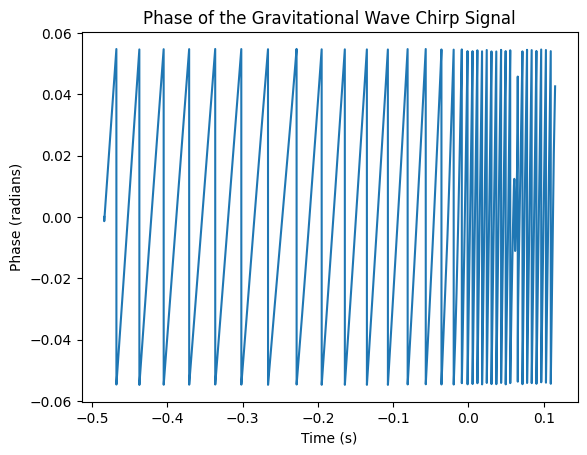

In [49]:
phase = -np.unwrap(np.deg2rad(data['phase']))  
plt.plot(data['time'], phase)
plt.title('Phase of the Gravitational Wave Chirp Signal')
plt.xlabel('Time (s)')
plt.ylabel('Phase (radians)')
plt.show()

Let's look at its spectrogram!

In [50]:
from scipy.interpolate import interp1d

c:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Lib\site-packages\scipy\signal\_spectral_py.py:790: UserWarning: nperseg = 65536 is greater than input length  = 9815, using nperseg = 9815
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


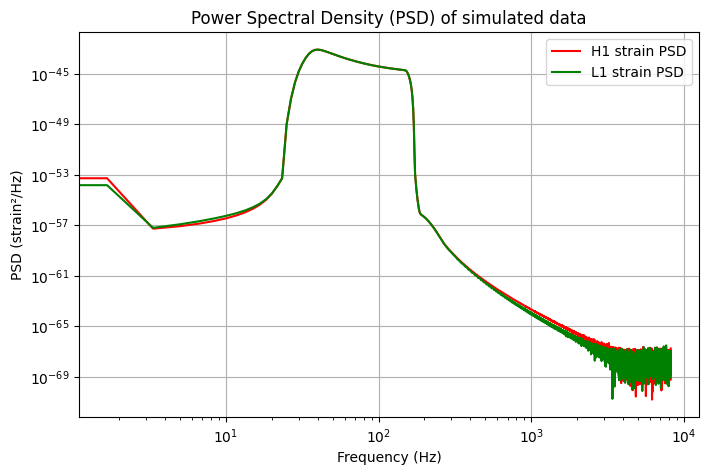

In [51]:
# Parameters
fs = 1/np.mean(np.diff(data['time'].values))  # Replace with your actual sampling frequency
NFFT = int(4 * fs)  # Increase segment size to smooth PSD
fmin = 10
fmax = 2000

# Compute PSD using Welch's method (Better than mlab.psd)
freqs_H1, Pxx_H1 = welch(data['h_+'].values, fs=fs, nperseg=NFFT)
freqs_L1, Pxx_L1 = welch(data['h_x'].values, fs=fs, nperseg=NFFT)

# Interpolations for Whitening (Optional)
psd_H1 = interp1d(freqs_H1, Pxx_H1, kind='linear', fill_value="extrapolate")
psd_L1 = interp1d(freqs_L1, Pxx_L1, kind='linear', fill_value="extrapolate")

# Plot the PSD
plt.figure(figsize=(8, 5))
plt.loglog(freqs_H1, Pxx_H1, 'r', label='H1 strain PSD')
plt.loglog(freqs_L1, Pxx_L1, 'g', label='L1 strain PSD')
plt.grid()
plt.ylabel('PSD (strain²/Hz)')
plt.xlabel('Frequency (Hz)')
plt.legend(loc='upper right')
plt.title('Power Spectral Density (PSD) of simulated data')
plt.savefig('GW150914_PSD.png')
plt.show()


Let's look now at the frequency behaviour as a function of time

c:\Users\ricca\Documents\Unimib-Code\AstroStatistics\AML\Lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should follow the format cmorB-C, where B and C are floats representing the bandwidth frequency and center frequency, respectively (example, for backward compatibility: cmor = cmor1.0-0.5).
  wavelet = DiscreteContinuousWavelet(wavelet)


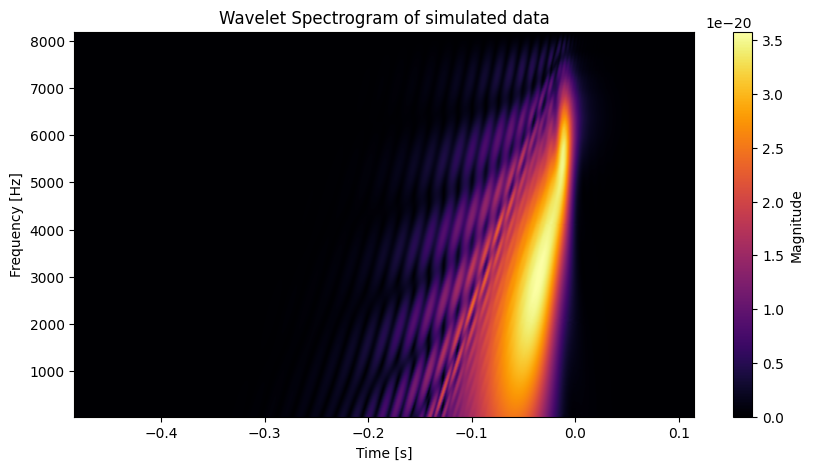

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Assuming you have time and strain data
# Replace these with your actual data
t = data['time'].values  # Example time array
h_plus = data['h_+'].values

# Define scales and wavelet function
scales = np.arange(1, 256)
wavelet = 'cmor'  # Complex Morlet wavelet

# Compute Continuous Wavelet Transform (CWT)
coefficients, frequencies = pywt.cwt(h_plus, scales, wavelet, sampling_period=t[1] - t[0])

# Plot the spectrogram
plt.figure(figsize=(10, 5))
plt.imshow(abs(coefficients), aspect='auto', extent=[t[0], t[-1], frequencies[-1], frequencies[0]], cmap='inferno')
plt.colorbar(label='Magnitude')
plt.xlabel("Time [s]")
plt.ylabel("Frequency [Hz]")
plt.title("Wavelet Spectrogram of simulated data")
plt.show()


In [71]:
D = 5
phases = np.arange(min(data['phase']),max(data['phase'])+(max(data['phase'])-min(data['phase']))/D, (max(data['phase'])-min(data['phase']))/D)

In [72]:
# Set the precision (e.g., to 6 decimal places)
precision = 6
indices = [np.argmin(np.abs(np.round(data['phase'], precision) - np.round(phase, precision))) for phase in phases]

'''
# Print the closest phase and index
for idx, phase in zip(indices, phases):
    print(f"Target phase: {np.round(phase, precision)}, Closest phase in data: {np.round(data['phase'].iloc[idx], precision)}, Index: {idx}")
'''

'\n# Print the closest phase and index\nfor idx, phase in zip(indices, phases):\n    print(f"Target phase: {np.round(phase, precision)}, Closest phase in data: {np.round(data[\'phase\'].iloc[idx], precision)}, Index: {idx}")\n'

In [73]:
h_plus  = data['h_+'][indices]*1e23
h_cross = data['h_x'][indices]*1e23

In [74]:
N = 10 # Number of masses
theta = np.arange(0,2*np.pi+2*np.pi/N, 2*np.pi/N)  # Angles for N masses
t = np.arange(0,100+100/N, 100/N)  #
x = c * (t - theta/omega)
x0 = np.cos(omega * (t - x/c))  # X-coordinates
y0 = np.sin(omega * (t - x/c))  # Y-coordinates
positions0 = np.vstack((x0, y0))  # Shape (2,4)

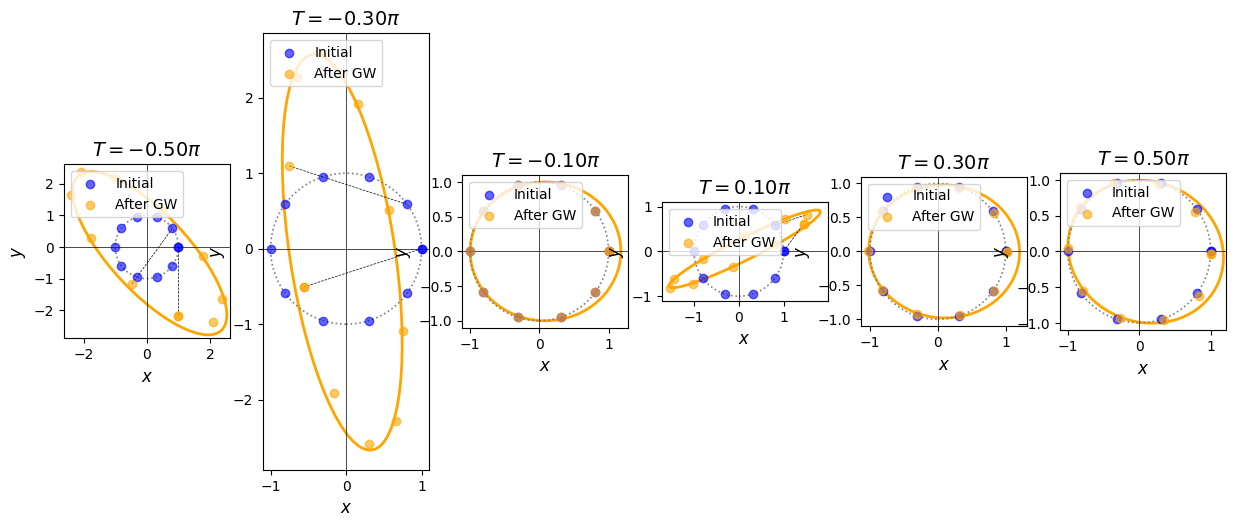

In [75]:
# Create the subplots
fig, axs = plt.subplots(1, D+1, figsize=(15, 10), sharex=False, sharey=False)
# Loop over each phase value
for i, phi in enumerate(phases):
    ax = axs[i]
    
    # Calculate strain tensor h_ij
    h_22 = h_plus.values[i]
    h_33 = -h_22
    h_23 = h_32 = h_cross.values[i]

    h = np.array([[h_22, h_23],
                    [h_32, h_33]])

    # Get new positions after applying strain
    positions_new = get_positions(h, positions0)

    # Plot the phase results
    plot_phase(ax, positions0, positions_new, phi, f"Phase {i+1}")

# Adjust layout for better spacing
#fig.suptitle('EXTREMELY exagerated motion', fontsize=26)
#plt.tight_layout()